In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint 
from sklearn.model_selection import GridSearchCV





In [2]:
train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [4]:
train.shape

(209673, 8)

In [5]:
test.shape

(89861, 8)

In [6]:
train.dtypes

trip_duration         float64
distance_traveled     float64
num_of_passengers     float64
fare                  float64
tip                     int64
miscellaneous_fees    float64
total_fare            float64
surge_applied           int64
dtype: object

In [7]:
test.dtypes

trip_duration         float64
distance_traveled     float64
num_of_passengers     float64
fare                    int64
tip                     int64
miscellaneous_fees    float64
total_fare              int64
surge_applied           int64
dtype: object

In [8]:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [9]:
test.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,89861.000000,89861.000000,89861.000000,89861.0,89861.000000,89861.000000,89861.0,89861.000000
mean,1148.178164,7.263529,1.286732,0.0,13.031048,15.190636,0.0,0.282280
std,4611.480867,554.965869,0.920910,0.0,18.692751,12.677904,0.0,0.450112
min,0.000000,0.020000,0.000000,0.0,0.000000,-0.500000,0.0,0.000000
25%,446.000000,1.950000,1.000000,0.0,0.000000,6.000000,0.0,0.000000
50%,705.000000,3.200000,1.000000,0.0,9.000000,9.750000,0.0,0.000000
75%,1094.000000,5.730000,1.000000,0.0,20.000000,26.450000,0.0,1.000000
max,86395.000000,145517.600000,9.000000,0.0,719.000000,431.500000,0.0,1.000000


In [10]:
# convert fare amount to numeric 

In [11]:
train["total_fare"]=pd.to_numeric(train["total_fare"],errors="coerce")#converts non numeric to nan

In [12]:
train.dtypes

trip_duration         float64
distance_traveled     float64
num_of_passengers     float64
fare                  float64
tip                     int64
miscellaneous_fees    float64
total_fare            float64
surge_applied           int64
dtype: object

In [13]:
train

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [14]:
train=train.drop(train[train['trip_duration'].isnull()].index,axis=0)
print(train.shape)
print(train['trip_duration'].isnull().sum())

(209673, 8)
0


In [15]:
train['num_of_passengers'].describe()

count    209673.000000
mean          1.292808
std           0.930754
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           9.000000
Name: num_of_passengers, dtype: float64

In [16]:
train=train.drop(train[train['num_of_passengers']>6].index,axis=0)

In [17]:
train['num_of_passengers'].describe()

count    209638.000000
mean          1.291660
std           0.926554
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: num_of_passengers, dtype: float64

In [18]:
train=train.drop(train[train['num_of_passengers']==0].index,axis=0)

In [19]:
train['num_of_passengers'].describe()


count    208885.000000
mean          1.296316
std           0.924966
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: num_of_passengers, dtype: float64

In [20]:
train['num_of_passengers'].sort_values(ascending=True)

0         1.0
134347    1.0
134349    1.0
134350    1.0
134351    1.0
         ... 
176386    6.0
161066    6.0
141723    6.0
141722    6.0
155062    6.0
Name: num_of_passengers, Length: 208885, dtype: float64

In [21]:
train=train.drop(train[train['num_of_passengers'].isnull()].index,axis=0)

In [22]:
train.shape

(208885, 8)

In [23]:
print(train['num_of_passengers'].isnull().sum())

0


In [24]:
train["total_fare"].sort_values(ascending=False)

34028     4472.250
62108     3969.750
31936     3909.750
62607     3887.250
34734     3857.625
            ...   
168824       0.000
113055       0.000
108666       0.000
114353       0.000
43703        0.000
Name: total_fare, Length: 208885, dtype: float64

In [25]:
Counter(train["total_fare"]<0)

Counter({False: 208885})

In [26]:
train=train.drop(train[train['total_fare']>454].index,axis=0)

In [27]:
train=train.drop(train[train['total_fare']==0].index,axis=0)

In [28]:
train["distance_traveled"].sort_values(ascending=False)

197339    57283.91
83097      1136.50
89007       131.89
146119      106.06
69442       105.85
            ...   
4313          0.02
167199        0.02
58776         0.02
191949        0.02
114686        0.02
Name: distance_traveled, Length: 206063, dtype: float64

In [29]:
train=train.drop(train[train['total_fare']<0].index,axis=0)

In [30]:
train

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0
...,...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,202.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,95.325,1
209670,571.0,2.82,1.0,63.75,0,6.000,69.750,0
209671,491.0,2.16,1.0,56.25,0,13.500,69.750,0


In [31]:
train=train.drop(train[train["distance_traveled"]>8000].index,axis=0)

In [32]:
train=train.drop(train[train['total_fare']<1].index,axis=0)

In [33]:
train.shape

(206062, 8)

In [34]:
train["distance_traveled"]

0          2.75
1          3.43
2          3.12
3          5.63
4          2.09
          ...  
209668     8.42
209669     1.29
209670     2.82
209671     2.16
209672    33.72
Name: distance_traveled, Length: 206062, dtype: float64

In [35]:
drop_columns=["fare","miscellaneous_fees","tip"]

In [36]:
train=train.drop(drop_columns,axis=1)

In [37]:
train

,trip_duration,distance_traveled,num_of_passengers,total_fare,surge_applied
0,748.0,2.75,1.0,105.300,0
1,1187.0,3.43,1.0,142.200,0
2,730.0,3.12,1.0,97.875,1
3,671.0,5.63,3.0,99.750,0
4,329.0,2.09,1.0,70.200,0
...,...,...,...,...,...
209668,1617.0,8.42,1.0,202.800,0
209669,438.0,1.29,1.0,95.325,1
209670,571.0,2.82,1.0,69.750,0
209671,491.0,2.16,1.0,69.750,0


In [38]:
test

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,0,13,13.700,0,0
89857,519.0,2.61,1.0,0,7,13.850,0,0
89858,450.0,2.24,1.0,0,0,26.625,0,1
89859,919.0,4.12,1.0,0,25,30.200,0,1


In [39]:
test=test.drop(train[train['trip_duration'].isnull()].index,axis=0)

In [40]:
print(test.shape)
print(test['trip_duration'].isnull().sum())

(89861, 8)
0


In [41]:
test['num_of_passengers'].describe()

count    89861.000000
mean         1.286732
std          0.920910
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: num_of_passengers, dtype: float64

In [42]:
test=test.drop(test[test['num_of_passengers']>6].index,axis=0)

In [43]:
test.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,89840.000000,89840.000000,89840.000000,89840.0,89840.000000,89840.000000,89840.0,89840.000000
mean,1148.288134,7.264419,1.285174,0.0,13.030955,15.192661,0.0,0.282324
std,4612.001565,555.030719,0.915319,0.0,18.686931,12.676523,0.0,0.450133
min,0.000000,0.020000,0.000000,0.0,0.000000,-0.500000,0.0,0.000000
25%,446.000000,1.950000,1.000000,0.0,0.000000,6.000000,0.0,0.000000
50%,705.000000,3.200000,1.000000,0.0,9.000000,9.750000,0.0,0.000000
75%,1094.000000,5.730000,1.000000,0.0,20.000000,26.450000,0.0,1.000000
max,86395.000000,145517.600000,6.000000,0.0,719.000000,431.500000,0.0,1.000000


In [44]:
test=test.drop(test[test['num_of_passengers']==0].index,axis=0)

In [45]:
test=test.drop(test[test['num_of_passengers'].isnull()].index,axis=0)

In [46]:
print(test['num_of_passengers'].isnull().sum())

0


In [47]:
test["total_fare"].sort_values(ascending=False)

0        0
59916    0
59924    0
59923    0
59922    0
        ..
29957    0
29956    0
29955    0
29954    0
89860    0
Name: total_fare, Length: 89464, dtype: int64

In [48]:
Counter(test["total_fare"]<0)

Counter({False: 89464})

In [49]:
test=test.drop(test[test['total_fare']>454].index,axis=0)

In [50]:
test

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,0,13,13.700,0,0
89857,519.0,2.61,1.0,0,7,13.850,0,0
89858,450.0,2.24,1.0,0,0,26.625,0,1
89859,919.0,4.12,1.0,0,25,30.200,0,1


In [51]:
test["distance_traveled"].sort_values(ascending=False)

12792    145517.60
89500     80627.76
88418       199.09
2234        176.75
58962       152.84
           ...    
78069         0.02
30455         0.02
8995          0.02
88293         0.02
55290         0.02
Name: distance_traveled, Length: 89464, dtype: float64

In [52]:
test=test.drop(train[train["distance_traveled"]>8000].index,axis=0)

In [53]:
test=test.drop(train[train["distance_traveled"]==0].index,axis=0)

In [54]:
test=test.drop(train[train["distance_traveled"]<0].index,axis=0)

In [55]:
test

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0,0
1,429.0,1.48,4.0,0,0,13.500,0,0
2,856.0,4.15,1.0,0,24,6.000,0,0
3,622.0,3.22,1.0,0,15,5.625,0,0
4,507.0,3.98,1.0,0,0,2.250,0,0
...,...,...,...,...,...,...,...,...
89856,435.0,2.24,1.0,0,13,13.700,0,0
89857,519.0,2.61,1.0,0,7,13.850,0,0
89858,450.0,2.24,1.0,0,0,26.625,0,1
89859,919.0,4.12,1.0,0,25,30.200,0,1


In [56]:
drop_columns=["fare","miscellaneous_fees","tip"]

In [57]:
test=test.drop(drop_columns,axis=1)

In [58]:
test

,trip_duration,distance_traveled,num_of_passengers,total_fare,surge_applied
0,1076.0,4.18,1.0,0,0
1,429.0,1.48,4.0,0,0
2,856.0,4.15,1.0,0,0
3,622.0,3.22,1.0,0,0
4,507.0,3.98,1.0,0,0
...,...,...,...,...,...
89856,435.0,2.24,1.0,0,0
89857,519.0,2.61,1.0,0,0
89858,450.0,2.24,1.0,0,1
89859,919.0,4.12,1.0,0,1


In [59]:
test.dtypes

trip_duration        float64
distance_traveled    float64
num_of_passengers    float64
total_fare             int64
surge_applied          int64
dtype: object

In [60]:
train["num_of_passengers"]=train["num_of_passengers"].astype("int64")

In [61]:
train.dtypes

trip_duration        float64
distance_traveled    float64
num_of_passengers      int64
total_fare           float64
surge_applied          int64
dtype: object

In [62]:
train["trip_duration"]=train["trip_duration"].astype("int64")

In [63]:
train["distance_traveled"]=train["distance_traveled"].astype("int64")

In [64]:
train["total_fare"]=train["total_fare"].astype("int64")

In [65]:
train.dtypes

trip_duration        int64
distance_traveled    int64
num_of_passengers    int64
total_fare           int64
surge_applied        int64
dtype: object

In [66]:
train["distance_traveled"]=train["distance_traveled"].astype("float64")

In [67]:
train.dtypes

trip_duration          int64
distance_traveled    float64
num_of_passengers      int64
total_fare             int64
surge_applied          int64
dtype: object

In [68]:
test["trip_duration"]=test["trip_duration"].astype("int64")

In [69]:
test["num_of_passengers"]=test["num_of_passengers"].astype("int64")

In [70]:
test.dtypes

trip_duration          int64
distance_traveled    float64
num_of_passengers      int64
total_fare             int64
surge_applied          int64
dtype: object

<Axes: xlabel='num_of_passengers', ylabel='count'>

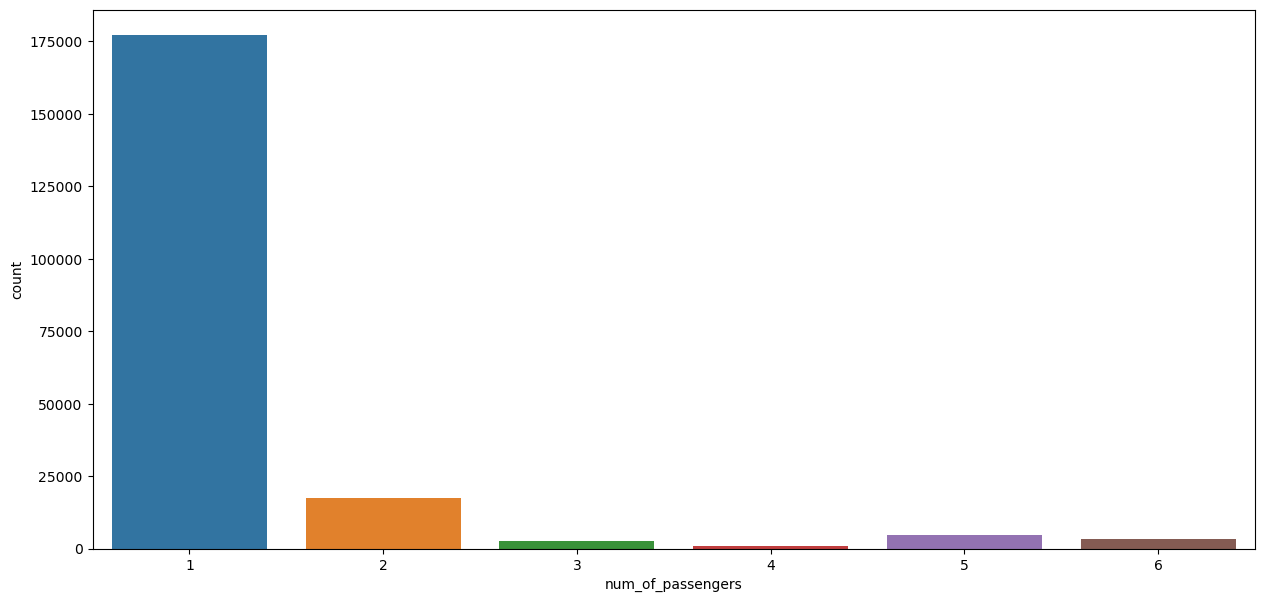

In [71]:
plt.figure(figsize=(15,7))
sns.countplot(x="num_of_passengers",data=train)

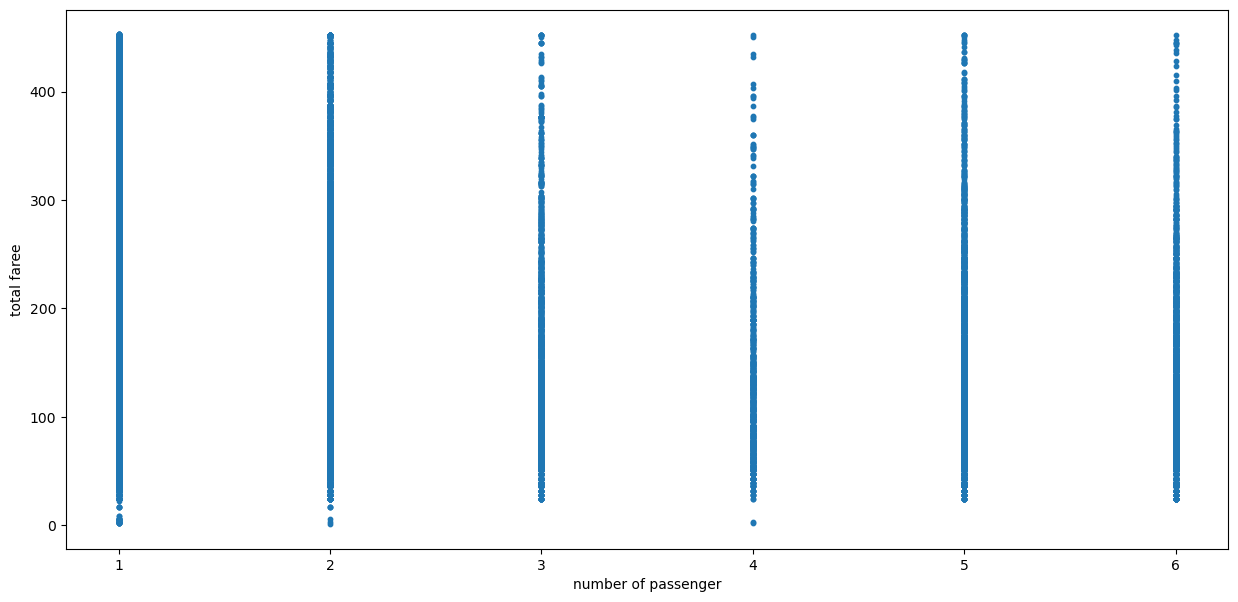

In [72]:
plt.figure(figsize=(15,7))
plt.scatter(x=train["num_of_passengers"],y=train["total_fare"],s=10)
plt.xlabel("number of passenger")
plt.ylabel("total faree")
plt.show()

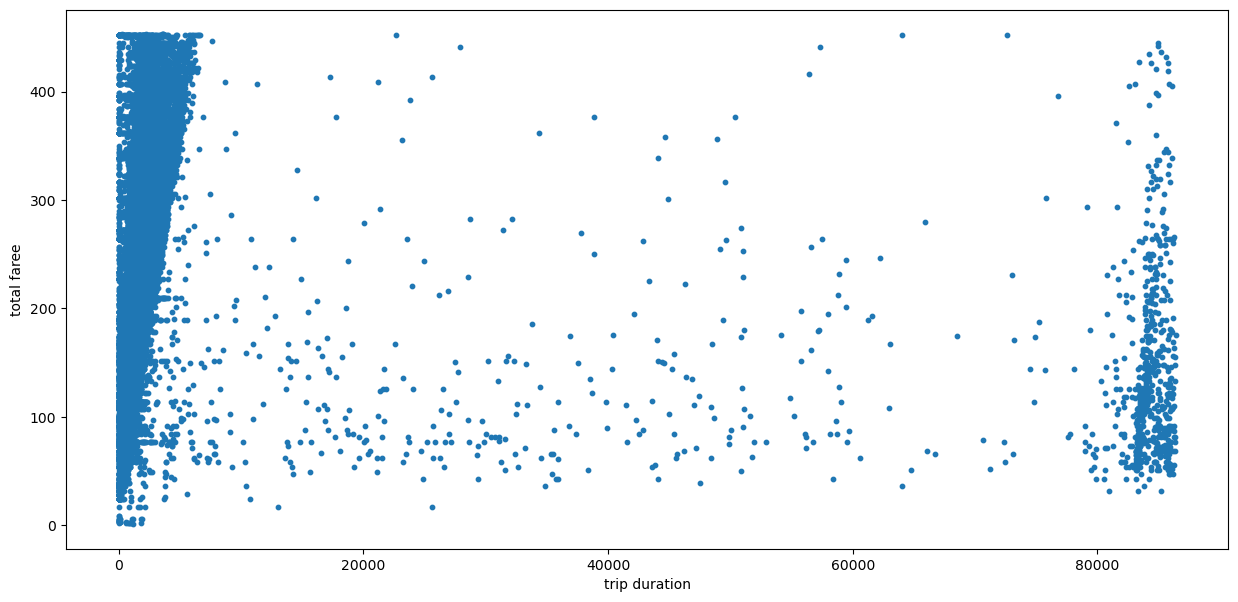

In [73]:
plt.figure(figsize=(15,7))
plt.scatter(x=train["trip_duration"],y=train["total_fare"],s=10)
plt.xlabel("trip duration")
plt.ylabel("total faree")
plt.show()

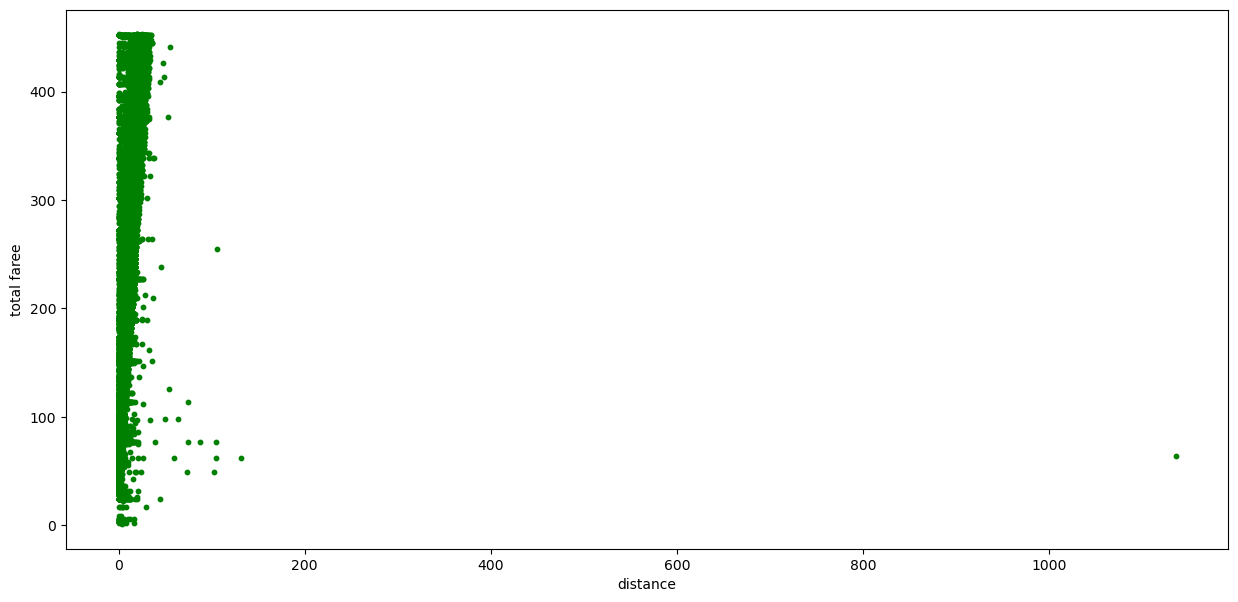

In [74]:
plt.figure(figsize=(15,7))
plt.scatter(x=train["distance_traveled"],y=train["total_fare"],s=10,c="g")
plt.xlabel("distance")
plt.ylabel("total faree")
plt.show()

total_fare


/var/folders/4r/12d0sssd0mdbgwbrthd30jk40000gn/T/ipykernel_1757/2524115376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


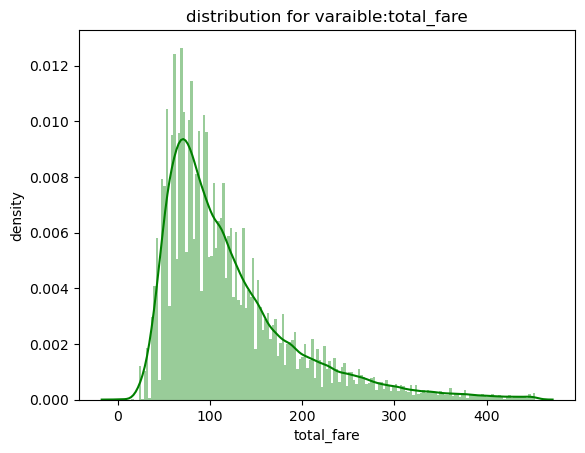

distance_traveled


/var/folders/4r/12d0sssd0mdbgwbrthd30jk40000gn/T/ipykernel_1757/2524115376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


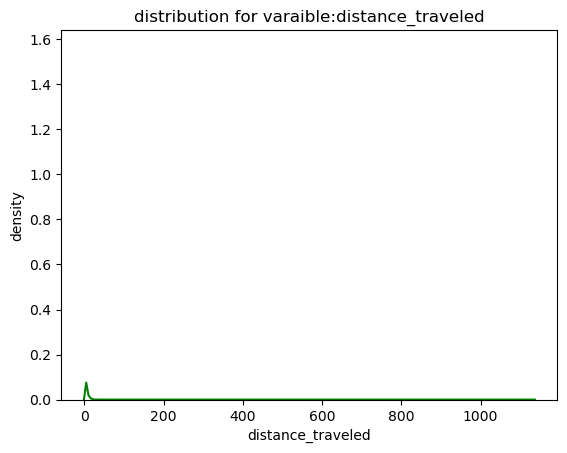

In [75]:
for i in ["total_fare","distance_traveled"]:
    print (i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("distribution for varaible:"+i)
    plt.ylabel("density")
    plt.show()

In [76]:
train["total_fare"]= np.log1p(train["total_fare"])
train["distance_traveled"]=np.log1p(train["distance_traveled"])

total_fare


/var/folders/4r/12d0sssd0mdbgwbrthd30jk40000gn/T/ipykernel_1757/2524115376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


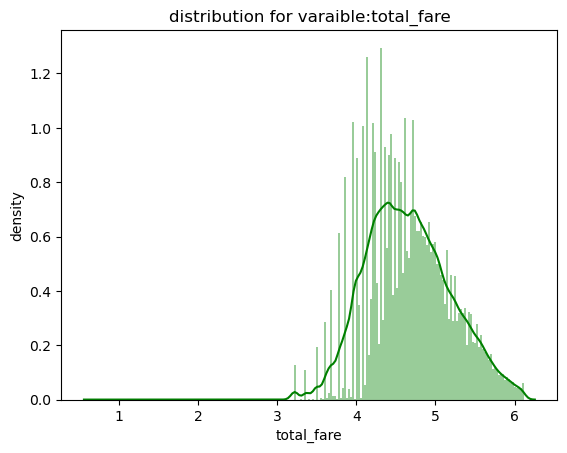

distance_traveled


/var/folders/4r/12d0sssd0mdbgwbrthd30jk40000gn/T/ipykernel_1757/2524115376.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[i],bins='auto',color='green')


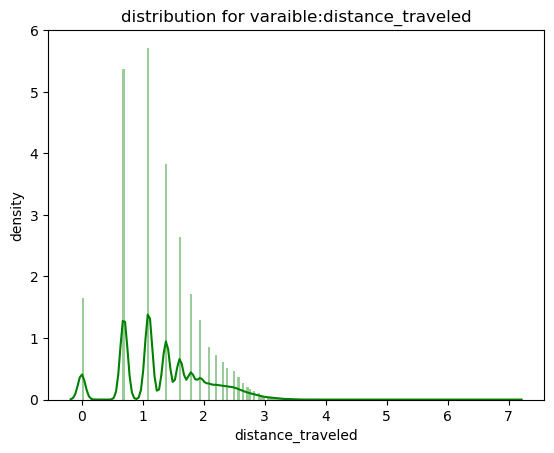

In [77]:
for i in ["total_fare","distance_traveled"]:
    print (i)
    sns.distplot(train[i],bins='auto',color='green')
    plt.title("distribution for varaible:"+i)
    plt.ylabel("density")
    plt.show()

distance_traveled


/var/folders/4r/12d0sssd0mdbgwbrthd30jk40000gn/T/ipykernel_1757/3988461798.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test[i],bins='auto',color='green')


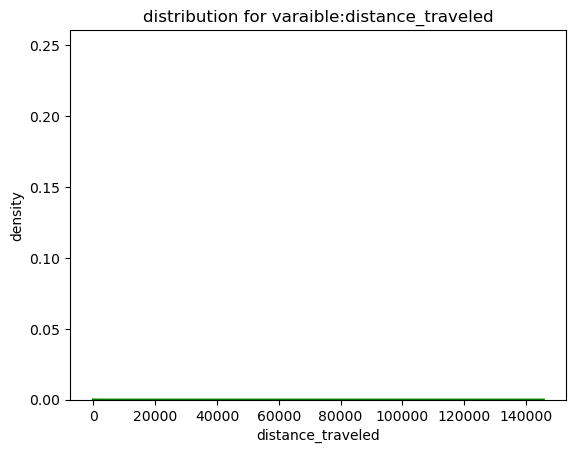

In [78]:
for i in ["distance_traveled"]:
    print (i)
    sns.distplot(test[i],bins='auto',color='green')
    plt.title("distribution for varaible:"+i)
    plt.ylabel("density")
    plt.show()

In [79]:
x_train,x_test,y_train,y_test=train_test_split(train.iloc[:,train.columns!= 'total_fare'],train.iloc[:,3],test_size=0.20,random_state=1)

In [80]:
x_train

,trip_duration,distance_traveled,num_of_passengers,surge_applied
157864,372,0.693147,1,0
43757,4156,2.564949,2,0
42446,907,0.000000,1,0
127019,1292,1.609438,1,0
197374,523,1.098612,1,0
...,...,...,...,...
74651,470,1.098612,1,0
111170,482,1.098612,1,0
50975,1615,2.484907,1,0
5294,703,1.609438,1,0


In [81]:
y_train

157864    3.871201
43757     5.796058
42446     5.828946
127019    4.812184
197374    4.682131
            ...   
74651     4.382027
111170    4.276666
50975     5.659482
5294      4.709530
130290    4.189655
Name: total_fare, Length: 164849, dtype: float64

In [82]:
x_train.shape

(164849, 4)

In [83]:
x_test.shape

(41213, 4)

In [84]:
y_test
y_train

157864    3.871201
43757     5.796058
42446     5.828946
127019    4.812184
197374    4.682131
            ...   
74651     4.382027
111170    4.276666
50975     5.659482
5294      4.709530
130290    4.189655
Name: total_fare, Length: 164849, dtype: float64

In [114]:
fit_LR=LinearRegression().fit(x_train,y_train)

In [115]:
pred_train_lr=fit_LR.predict(x_train)
pred_test_lr=fit_LR.predict(x_test)

In [116]:
rmse_lr_train=np.sqrt(mean_squared_error(y_train,pred_train_lr))
rmse_lr_test=np.sqrt(mean_squared_error(y_test,pred_test_lr))

In [117]:
print("root mean sqaured value of train data:" +str(rmse_lr_train))
print("root mean squared value of test data:" +str(rmse_lr_test))

root mean sqaured value of train data:0.23772596294488327
root mean squared value of test data:0.2420432087748733


In [118]:
from sklearn.metrics import r2_score
r2_score(y_train,pred_train_lr)
r2_score(y_test,pred_test_lr)

0.7958869328141039

In [119]:
# descion tree

In [120]:
fit_dt=DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)

In [121]:
pred_train_dt=fit_dt.predict(x_train)
pred_test_dt=fit_dt.predict(x_test)

In [122]:
rmse_train_dt=np.sqrt(mean_squared_error(y_train,pred_train_dt))
rmse_test_dt= np.sqrt(mean_squared_error(y_test,pred_test_dt))

In [123]:
print("root mean sqaured value of train data:" +str(rmse_train_dt))
print("root mean squared value of test data:" +str(rmse_test_dt))

root mean sqaured value of train data:0.24140715515250427
root mean squared value of test data:0.24384336000356488


In [124]:
r2_score(y_train,pred_train_dt)
r2_score(y_test,pred_test_dt)

0.7928395368311594

In [125]:
r2_score(y_test,pred_test_dt)

0.7928395368311594

In [126]:
#random forest


In [127]:
fit_rf=RandomForestRegressor(n_estimators=200).fit(x_train,y_train)

In [128]:
pred_x_train_rf=fit_rf.predict(x_train)
pred_x_test_rf= fit_rf.predict(x_test)

In [129]:
rmse_train_rf=np.sqrt(mean_squared_error(y_train,pred_x_train_rf))
rmse_test_rf= np.sqrt(mean_squared_error(y_test,pred_x_test_rf))

In [130]:
print("root mean sqaured value of train data:" +str(rmse_train_rf))
print("root mean squared value of test data:" +str(rmse_test_rf))

root mean sqaured value of train data:0.154792882439351
root mean squared value of test data:0.2002334175304887


In [131]:
r2_score(y_train,pred_x_train_rf)
r2_score(y_test,pred_x_test_rf)

0.8603123133741675

In [132]:
#gradient boosting

In [133]:
fit_gb=GradientBoostingRegressor().fit(x_train,y_train)

In [105]:
pred_train_gb=fit_gb.predict(x_train)
pred_test_gb=fit_gb.predict(x_test)

In [106]:
rmse_train_gb=np.sqrt(mean_squared_error(y_train,pred_train_gb))
rmse_test_gb= np.sqrt(mean_squared_error(y_test,pred_test_gb))

In [107]:
print("root mean sqaured value of train data:" +str(rmse_train_gb))
print("root mean squared value of test data:" +str(rmse_test_gb))

root mean sqaured value of train data:0.18260766869468564
root mean squared value of test data:0.18826481288217514


In [108]:
r2_score(y_train,pred_train_gb)
r2_score(y_test,pred_test_gb)

0.8765124087623519

In [109]:
rf=RandomForestRegressor(random_state=42)
print("parameters in juse")
pprint(rf.get_params()) 

parameters in juse
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [136]:

y_train.shape

(164849,)

In [ ]:
gb=GradientBoostingRegressor(random_state=42)
print("parameters in juse")
pprint(gb.get_params()) 

In [1]:
gb=GradientBoostingRegressor(random_state=0)
n_estimator=list(range(1,20,2))
depth=list(range(1,100,2))
rand_grid={'n_estimator':n_estimator, 'max_depth':depth}
randcv_gb = RandomizedSearchCV(gb,param_distributions=rand_grid,n_iter=5,cv=5,random_state=0)
randcv_GB = randcv_gb.fit(x_train, y_train)
pred_gb = randcv_GB.predict(x_test)
veiw_bestparams=randcv_GB.best_params_
best_model_gb=randcv_GB.best_estimator_
predict_rrf_gb=best_model_gb.predict(x_test)
rrf_gb_r2=r2_score(y_test,pred_rrf)
rrf_rmse_gb=np.sqrt(mean_squared_error(y_test,predict_rrf))

NameError: name 'GradientBoostingRegressor' is not defined

In [113]:
rff=  RandomForestRegressor(random_state=0)
n_estimator=list(range(1,20,1))
depth=list(range(5,15,2))
grid_search={'n_estimator':n_estimator,'max_depth':depth}
gridcv_rf=GridSearchCV(rrf,param_grid=grid_search,cv=5)
gridcv_RF=gridcv_rf.fit(x_train,y_train)
view_best_params=gridcv_RF.best_params_
gridcv_rf_pred_test=gridcv_RF.predict(test)


ValueError: Found input variables with inconsistent numbers of samples: [164849, 41213]

In [137]:
x_train

,trip_duration,distance_traveled,num_of_passengers,surge_applied
157864,372,0.693147,1,0
43757,4156,2.564949,2,0
42446,907,0.000000,1,0
127019,1292,1.609438,1,0
197374,523,1.098612,1,0
...,...,...,...,...
74651,470,1.098612,1,0
111170,482,1.098612,1,0
50975,1615,2.484907,1,0
5294,703,1.609438,1,0


In [138]:
y_train


157864    3.871201
43757     5.796058
42446     5.828946
127019    4.812184
197374    4.682131
            ...   
74651     4.382027
111170    4.276666
50975     5.659482
5294      4.709530
130290    4.189655
Name: total_fare, Length: 164849, dtype: float64

In [139]:
test.head()

,trip_duration,distance_traveled,num_of_passengers,total_fare,surge_applied
0,1076,4.18,1,0,0
1,429,1.48,4,0,0
2,856,4.15,1,0,0
3,622,3.22,1,0,0
4,507,3.98,1,0,0
